In [1]:
# Importing libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Data Exploration & Visualization of Football Players
Let's dive into graphical exploration of football players' data with the help of matplotlib library.

In [2]:
# Loading the dataset
data = pd.read_csv('Football_players_data.csv')
data.head()

,Name,Age,Nationality,Club,Wage,Preferred Foot,Position,Height,Weight
0,L. Messi,31,Argentina,FC Barcelona,€565K,Left,RF,5'7,159
1,Cristiano Ronaldo,33,Portugal,Juventus,€405K,Right,ST,6'2,183
2,Neymar Jr,26,Brazil,Paris Saint-Germain,€290K,Right,LW,5'9,150
3,De Gea,27,Spain,Manchester United,€260K,Right,GK,6'4,168
4,K. De Bruyne,27,Belgium,Manchester City,€355K,Right,RCM,5'11,154


In [3]:
data.columns

Index(['Name', 'Age', 'Nationality', 'Club', 'Wage', 'Preferred Foot',
       'Position', 'Height', 'Weight'],
      dtype='object')

In [4]:
data.describe()

,Age,Weight
count,24.000000,24.000000
mean,28.666667,171.875000
std,2.838657,17.850374
min,24.000000,146.000000
25%,26.750000,159.000000
50%,28.500000,168.000000
75%,31.250000,184.000000
max,33.000000,212.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Name            24 non-null     object
 1   Age             24 non-null     int64 
 2   Nationality     24 non-null     object
 3   Club            24 non-null     object
 4   Wage            24 non-null     object
 5   Preferred Foot  24 non-null     object
 6   Position        24 non-null     object
 7   Height          24 non-null     object
 8   Weight          24 non-null     int64 
dtypes: int64(2), object(7)
memory usage: 1.8+ KB


1. What may be deduced about the country-wise distribution of players?

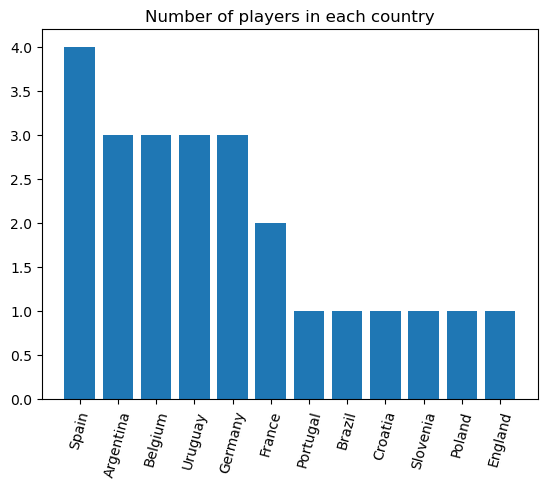

In [23]:
# Creating a bar chart
plt.bar(x=data['Nationality'].value_counts().index, height=data['Nationality'].value_counts().values)
plt.title("Number of players in each country")
plt.xticks(rotation=75)
plt.show()

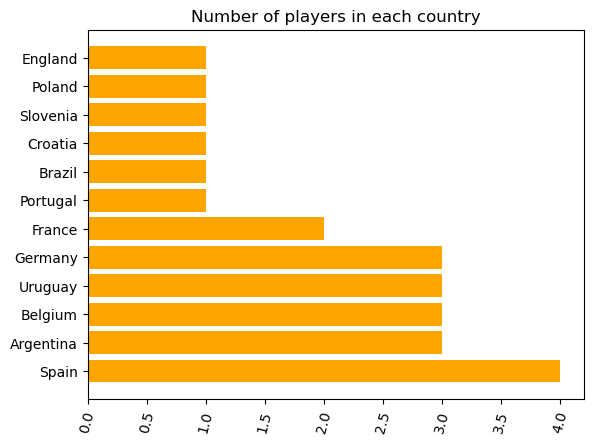

In [22]:
# Creating a horizontal bar chart
plt.barh(data['Nationality'].value_counts().index, data['Nationality'].value_counts().values, color="orange")
plt.title("Number of players in each country")
plt.xticks(rotation=75)
plt.show()

2. What's the proprotion of right and left footedness among the listed players?

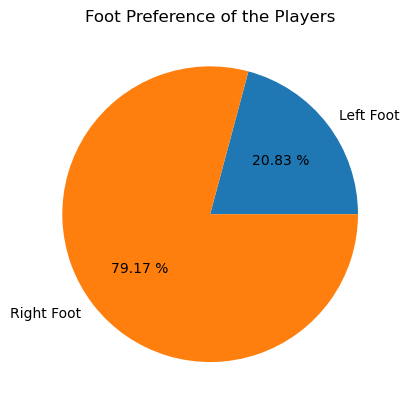

In [8]:
LF = data.loc[data['Preferred Foot'] == 'Left'].count()[0]
RF = data.loc[data['Preferred Foot'] == 'Right'].count()[0]
labels = ['Left Foot', 'Right Foot']

plt.title('Foot Preference of the Players')
# Creating a Pie Chart
plt.pie([LF,RF], labels = labels, autopct='%.2f %%')
plt.show()

# autopct: If not None, a string or function is used to label the wedges with their numerical value.
# Inside the wedge, the labels will be placed. The label will be fmt% pct if it is a format string.
# It will be invoked if it is a function.

3. Visualize the distribution of player heights to assess its normality

In [9]:
def height_to_cm(height):
    feet, inches = height.split("'")
    feet = int(feet)
    inches = int(inches)

    total_inches = feet * 12 + inches
    cm = total_inches * 2.54
    return cm

data['Height'] = data['Height'].apply(height_to_cm)
data['Height'].head()

0    170.18
1    187.96
2    175.26
3    193.04
4    180.34
Name: Height, dtype: float64

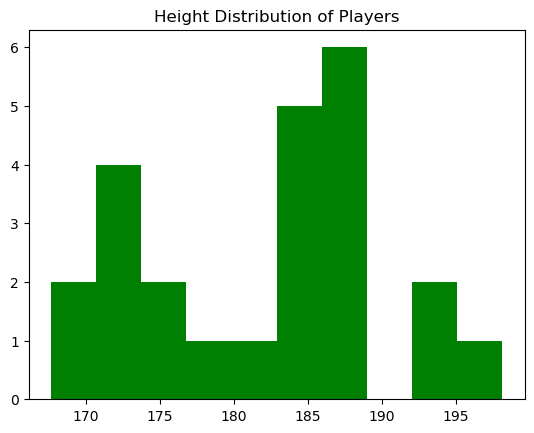

In [10]:
x = data['Height']

# Creating a histogram
plt.hist(x, bins = 10, color="green")
plt.title("Height Distribution of Players")
plt.show()

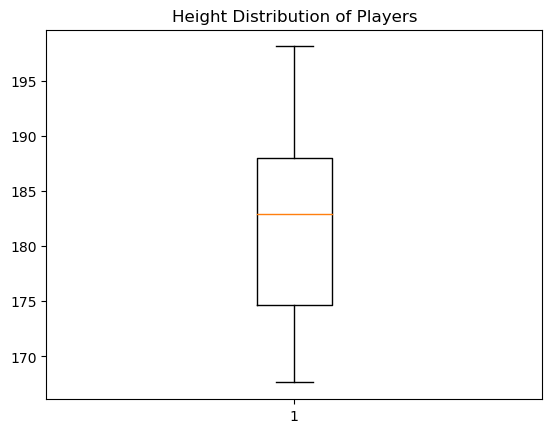

In [11]:
# Creating a boxplot
plt.boxplot(x)
plt.title("Height Distribution of Players")
plt.show()

4. Are the players' age and weight correlated with each other?

In [12]:
data.Age.min()

24

In [13]:
data.Age.max()

33

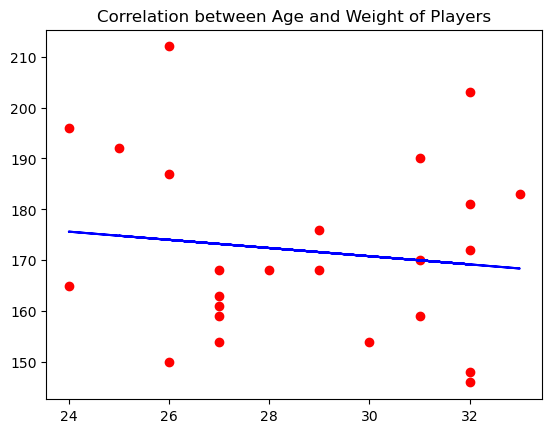

In [14]:
x = data.Age
y = data.Weight

# Creating a scatterplot
plt.scatter(x, y, color="red")
# Obtaining m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x, y, 1)
# Adding linear regression line to scatterplot
plt.plot(x, m*x+b, color="blue")

plt.title('Correlation between Age and Weight of Players')
plt.show()

5. Does the average player remuneration  vary with the club they belong to?

In [15]:
data['Wage'].unique()

array(['€565K', '€405K', '€290K', '€260K', '€355K', '€340K', '€420K',
       '€455K', '€380K', '€94K', '€205K', '€125K', '€285K', '€225K',
       '€145K', '€240K', '€315K', '€200K', '€130K', '€300K'], dtype=object)

In [16]:
data['Wage'] = data['Wage'].str.replace("€","").str.replace("K","")

In [17]:
data['Wage'].unique()

array(['565', '405', '290', '260', '355', '340', '420', '455', '380',
       '94', '205', '125', '285', '225', '145', '240', '315', '200',
       '130', '300'], dtype=object)

In [18]:
data['Wage'] = data['Wage'].astype('int64')

In [19]:
club_df = data.groupby('Club')['Wage'].mean()
club_df

Club
Atlético Madrid        121.333333
Chelsea                282.500000
FC Barcelona           393.750000
FC Bayern München      167.500000
Juventus               305.000000
Manchester City        313.333333
Manchester United      260.000000
Paris Saint-Germain    245.000000
Real Madrid            348.750000
Tottenham Hotspur      205.000000
Name: Wage, dtype: float64

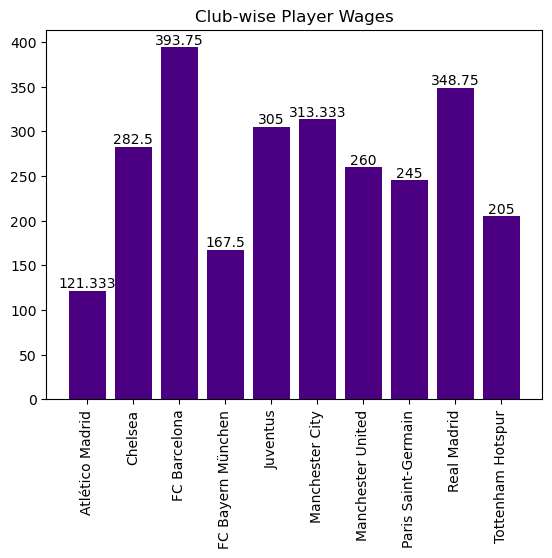

In [20]:
bars = plt.bar(x=club_df.index, height=club_df.values, color='indigo')
plt.bar_label(bars)
plt.title("Club-wise Player Wages")
plt.xticks(rotation=90)
plt.show()

In [21]:
## end of notebook